In [5]:
import pandas as pd
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

import os

## Cargar, corregir y unificar archivos

In [8]:
## Usar circuitos electorales de Tartagalensis

## Descargar los archivos de circuitos de git.
! git clone --no-checkout --filter=tree:0 https://github.com/tartagalensis/circuitos_electorales_AR
os.chdir('./circuitos_electorales_AR')
! git sparse-checkout set geojson
os.chdir('./../')


fatal: destination path 'circuitos_electorales_AR' already exists and is not an empty directory.


In [72]:

from pathlib import Path

# path_circuitos_geo = './mapaelectoral/geojson_CNE/'
path_circuitos_geo = './circuitos_electorales_AR/geojson/'
p = Path(path_circuitos_geo)

result_list = []

for file in sorted(p.glob('**/*')):
    print(file.name)
    gdf = gpd.read_file(path_circuitos_geo + file.name)
    
    ## Estas dos provincias tendrian algun problemita en el archivo de TTgalensis
    if file.name in ['SAN_JUAN.geojson', 'MISIONES.geojson']:
        gdf_ = gdf.copy()
        gdf_['circuito'] = gdf_['circuito'].astype(str).str.zfill(5)
        gdf_['codprov'] = gdf_['distrito'].astype(str).str.zfill(2)
        gdf_['coddepto'] = gdf_['indec_d'].astype(str).str.zfill(3)

        gdf = gdf_[['circuito', 'codprov', 'coddepto', 'geometry']]
        
    if file.name == 'CORDOBA.geojson':
        gdf['codprov'] = '04'

    ## Unify column names
    gdf = gdf.rename(columns = {'coddistrito': 'codprov', 'codseccion': 'coddepto'})
    
#     if gdf.shape != (0, 1): ## Si el archivo esta OK
#         print(gdf.provincia.unique()[0])

#         ## Correccion de errores
#         gdf.loc[gdf.departamen == 'Colon', 'indec_d'] = '008'
#         gdf.loc[gdf.departamen == 'Concordia', 'indec_d'] = '015'
#         gdf.loc[gdf.departamen == 'Villaguay', 'indec_d'] = '113'
#         gdf.loc[gdf.departamen == 'Pehuenches', 'indec_d'] = '091'
#         gdf.loc[gdf.departamen == 'Cañuelas', 'indec_d'] = '134'
#         gdf.loc[gdf.departamen == 'Esteban Echeverria', 'indec_d'] = '260'
#         gdf.loc[gdf.departamen == 'Florencio Varela', 'indec_d'] = '274'
#         gdf.loc[gdf.departamen == 'Magdalena', 'indec_d'] = '505'
#         gdf.loc[gdf.departamen == 'Morón', 'indec_d'] = '568'
#         gdf.loc[gdf.departamen == 'Pilar', 'indec_d'] = '638'
#         gdf.loc[gdf.departamen == 'San Vicente', 'indec_d'] = '778'
#         gdf.loc[gdf.departamen == '12 de Octubre', 'indec_d'] = '036'
#         gdf.loc[(gdf.provincia == 'Chaco')
#                     & (gdf.departamen == 'Almirante Brown'), 'indec_d'] = '043'

    result_list += [gdf]


circuitos_ARG = pd.concat(result_list)

circuitos_ARG.to_file('./mapaelectoral/circuitos-CNE-TTGL.geojson', driver='GeoJSON')


CABA.geojson
CATAMARCA.geojson
CHACO.geojson
CHUBUT.geojson
CORDOBA.geojson
CORRIENTES.geojson
ENTRERIOS.geojson
FORMOSA.geojson
JUJUY.geojson
LAPAMPA.geojson
LA_RIOJA.geojson
MENDOZA.geojson
MISIONES.geojson
NEUQUEN.geojson
PBA.geojson
RIO_NEGRO.geojson
SALTA.geojson
SANLUIS.geojson
SANTACRUZ.geojson
SANTAFE.geojson
SANTIAGO_DEL_ESTERO.geojson
SAN_JUAN.geojson
TIERRA_DEL_FUEGO.geojson
TUCUMAN.geojson


In [73]:
circuitos_ARG.count()

circuito    5589
codprov     5563
coddepto    5563
geometry    5559
seccion     1066
dtype: int64

<AxesSubplot:>

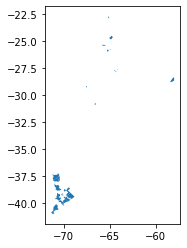

In [74]:
circuitos_ARG.loc[circuitos_ARG.codprov.isna()].plot()